The Widgets module has the graphing tools, matplotlib has the backend for graphs

In [33]:
import matplotlib.pyplot as plt

import spikeinterface.full as si
import spikeinterface.extractors as se
import spikeinterface.widgets as sw
from spikeinterface.sortingcomponents.peak_detection import detect_peaks


In [34]:
sw.set_default_plotter_backend(backend="matplotlib")

Get data

In [35]:
local_path = si.download_dataset(remote_path="mearec/mearec_test_10s.h5")
recording, sorting = se.read_mearec(local_path)

 modified: mearec/mearec_test_10s.h5 (file)
1 annex'd file (59.4 MB recorded total size)


make a sorting analyzer

In [36]:
analyzer = si.create_sorting_analyzer(sorting=sorting, recording=recording, format="memory")
# core extensions
analyzer.compute(["random_spikes", "waveforms", "templates", "noise_levels"])

# more extensions
analyzer.compute(["spike_amplitudes", "unit_locations", "spike_locations", "template_metrics"])

estimate_sparsity (no parallelization):   0%|          | 0/10 [00:00<?, ?it/s]

compute_waveforms (no parallelization):   0%|          | 0/10 [00:00<?, ?it/s]

noise_level (no parallelization):   0%|          | 0/20 [00:00<?, ?it/s]

Compute : spike_amplitudes + spike_locations (no parallelization):   0%|          | 0/10 [00:00<?, ?it/s]

plot traces

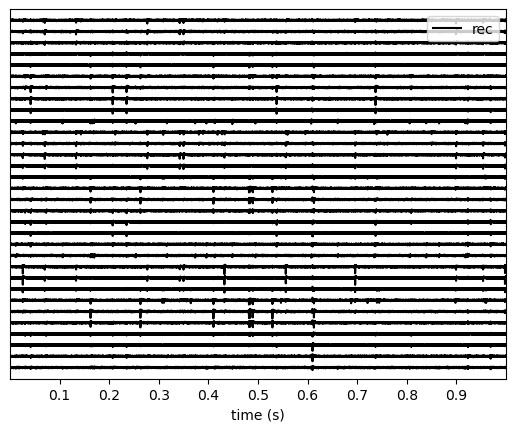

In [37]:
w_traces = sw.plot_traces(recording)

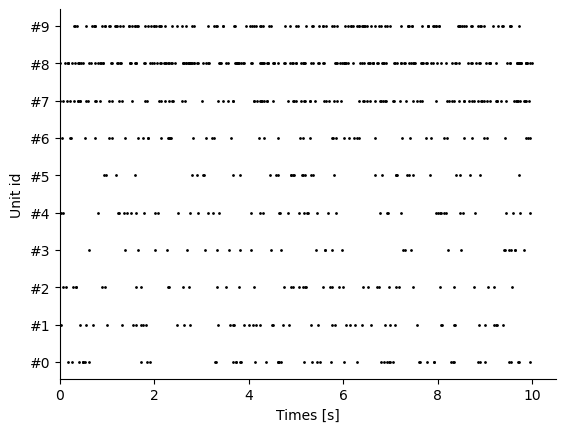

In [38]:
raster = sw.plot_rasters(sorting)

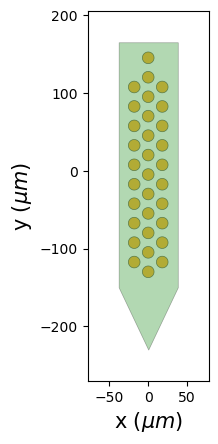

In [39]:
w_el = sw.plot_probe_map(recording)


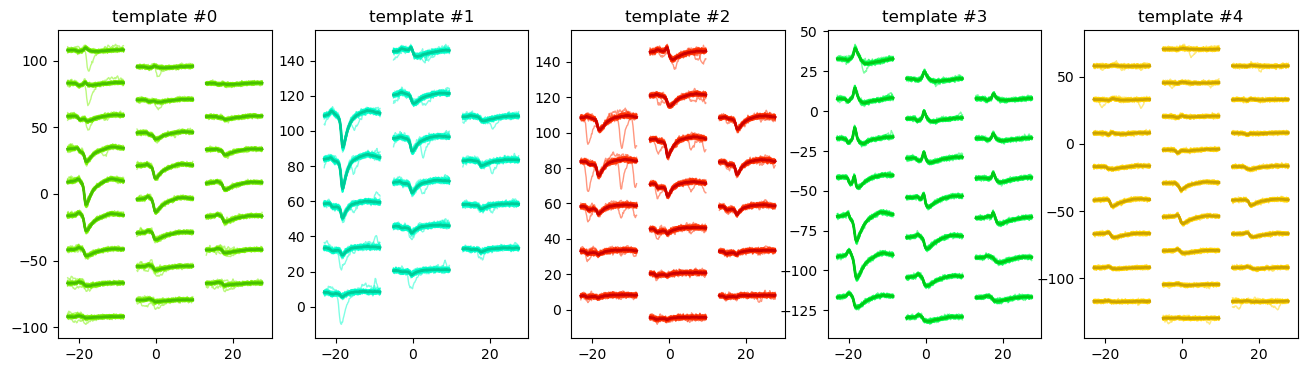

In [40]:
sw.plot_unit_waveforms(analyzer, unit_ids=sorting.unit_ids[:5], figsize=(16, 4))

We can filter the data with a bandpass

In [41]:
rec_filtred = si.bandpass_filter(recording=recording, freq_min=300.0, freq_max=6000.0, margin_ms=5.0)

peaks = detect_peaks(
    recording=rec_filtred,
    method="locally_exclusive",
    peak_sign="neg",
    detect_threshold=6,
    exclude_sweep_ms=0.3,
    radius_um=100,
    noise_levels=None,
    random_chunk_kwargs={},
    chunk_memory="10M",
    n_jobs=1,
    progress_bar=True,
)

noise_level (no parallelization):   0%|          | 0/20 [00:00<?, ?it/s]

detect peaks using locally_exclusive (no parallelization):   0%|          | 0/5 [00:00<?, ?it/s]

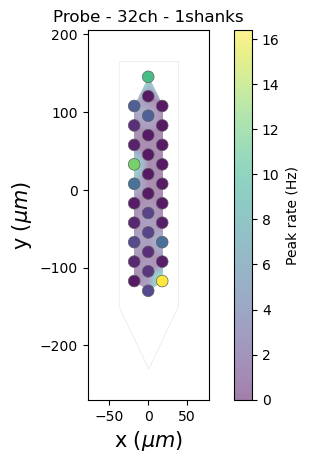

In [42]:
si.plot_peak_activity(recording=rec_filtred, peaks=peaks)

plt.show()


/home/niels/anaconda3/envs/si_env/lib/python3.11/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


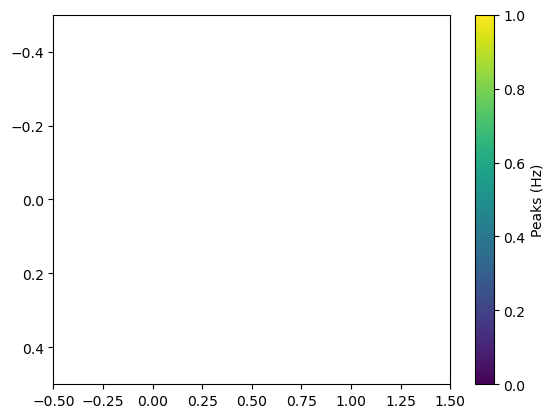

In [47]:
anim = si.plot_peak_activity(recording=rec_filtred, peaks=peaks, bin_duration_s=5)


plt.show()